In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

data = pd.read_csv("winequality-red.csv")

print("Data shape: ", data.shape)
print(data.head())
print(data.info())
print(data.describe())

Data shape:  (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7688\730267111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette='coolwarm')


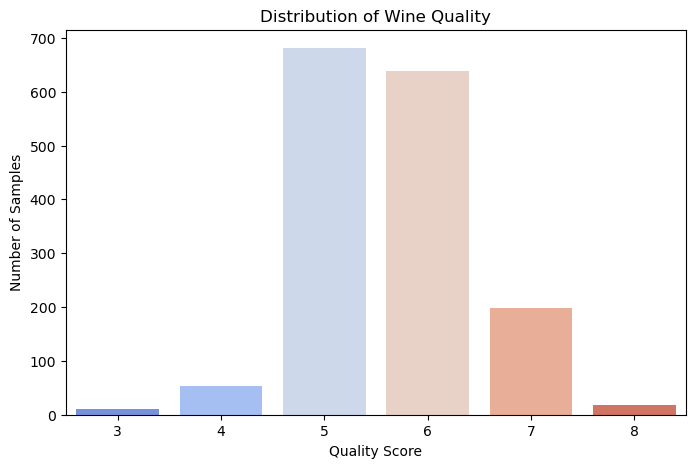

In [2]:
target = 'quality'
print(data[target].describe())
plt.figure(figsize=(8, 5))
sns.countplot(x=target, data=data, palette='coolwarm')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Number of Samples')
plt.show()

In [3]:
data['quality_label'] = data['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
data['acid_ratio'] = data['fixed acidity'] / (data['volatile acidity'] + 1)
data['sulfur_ratio'] = data['free sulfur dioxide'] / (data['total sulfur dioxide'] + 1)

label_mapping = {
    'low': 0, 'medium': 1, 'high': 2
}
data['quality_label'] = data['quality_label'].map(label_mapping)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📘 Training Best Random Forest...
Accuracy: 0.7875
F1 Score: 0.7786
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      1.00      0.95        10
           2       0.76      0.77      0.76       130
           3       0.77      0.76      0.76       132
           4       0.89      1.00      0.94        42
           5       0.00      0.00      0.00         5

    accuracy                           0.79       320
   macro avg       0.55      0.59      0.57       320
weighted avg       0.77      0.79      0.78       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


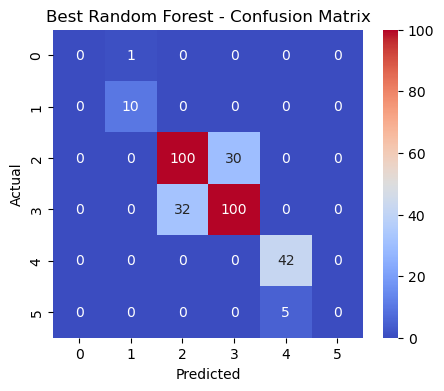


📘 Training Neural Network...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7875
F1 Score: 0.7802
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      1.00      0.95        10
           2       0.76      0.78      0.77       130
           3       0.78      0.76      0.77       132
           4       0.89      0.98      0.93        42
           5       0.00      0.00      0.00         5

    accuracy                           0.79       320
   macro avg       0.56      0.59      0.57       320
weighted avg       0.77      0.79      0.78       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


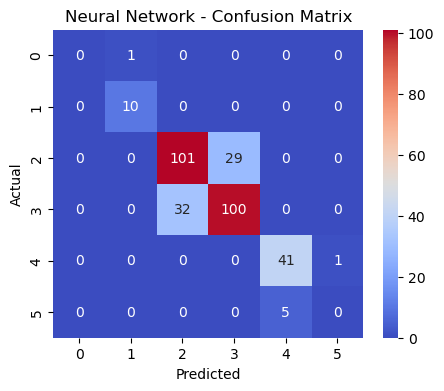


🏆 Model Comparison
                Model  Accuracy  F1 Score
1      Neural Network    0.7875  0.780180
0  Best Random Forest    0.7875  0.778638


In [5]:
X = data.drop(target, axis=1)
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

num_classes = len(np.unique(y_encoded))

models = {
    "Best Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42
    ),
    "Neural Network": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
}

results = []

for name, model in models.items():
    print(f"\n📘 Training {name}...")

    if name == "Neural Network":
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
        )
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
        nn = model
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        random_forest = model

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append((name, acc, f1))

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"]).sort_values(by="F1 Score", ascending=False)
print("\n🏆 Model Comparison")
print(results_df)

In [7]:
joblib.dump(random_forest, "random_forest.pkl")
joblib.dump(scaler, "scaler.pkl")
nn.save("neural_network.keras")
print("\nModels and scaler exported successfully:")
print(" - best_random_forest.pkl")
print(" - scaler.pkl")
print(" - best_neural_network.keras")


Models and scaler exported successfully:
 - best_random_forest.pkl
 - scaler.pkl
 - best_neural_network.keras
